In [63]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from raise_utils.metrics import ClassificationMetrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression

In [2]:
!ls ../Dodge/data/issue_close_time/14\ days

camel.csv        deeplearning.csv node.csv
cloudstack.csv   hadoop.csv       ofbiz.csv
cocoon.csv       hive.csv         qpid.csv


In [26]:
file = '../Dodge/data/defect/camel-1.2.csv'

In [27]:
df = pd.read_csv(file)

In [28]:
df.head()

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,camel,1.2,org.apache.camel.component.irc.IrcErrorLogger,9,0,0,5,24,0,1,...,1.0,1,0.000000,0.370370,0,0,22.555556,1,0.8889,0
1,camel,1.2,org.apache.camel.ProducerTemplate,27,1,0,6,27,351,1,...,0.0,0,0.000000,0.412037,0,0,0.000000,1,1.0000,3
2,camel,1.2,org.apache.camel.impl.JndiRegistry,9,1,0,3,18,30,1,...,1.0,0,0.000000,0.355556,0,0,8.000000,1,0.7778,0
3,camel,1.2,org.apache.camel.component.cxf.CxfSoapConsumer,7,1,0,27,50,7,3,...,1.0,3,0.000000,0.416667,0,0,26.428571,1,0.7143,0
4,camel,1.2,org.apache.camel.processor.TryProcessor,8,2,0,10,28,0,1,...,1.0,3,0.684211,0.371429,1,1,26.500000,2,1.0000,9


In [29]:
df.drop('name,version,name.1'.split(','), axis=1, inplace=True)

In [30]:
def get_model(C=1., gamma=1.):
    return SVC(kernel='rbf', C=C, gamma=gamma)

In [39]:
X = df.drop('bug', axis=1)
y = df['bug']
y[y != 0] = 1

smote = SMOTE()
smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-39-94679c7e175f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y != 0] = 1


In [47]:
# Throw 10 things at the wall.
n_samples = 30
recalls = []
pfs = []
cs = []
gammas = []
for i in range(n_samples):
    c = np.random.uniform(0.01, 10.)
    gamma = np.random.uniform(0.01, 0.1)
    
    cs.append(c)
    gammas.append(gamma)
    
    model = get_model(C=c, gamma=gamma)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    metr = ClassificationMetrics(y_test, preds)
    metr.add_metrics(['pd', 'pf'])
    rec, pf = metr.get_metrics()
    print(rec, pf)
    recalls.append(rec)
    pfs.append(pf)

0.3617021276595745 0.08571428571428572
0.2127659574468085 0.06666666666666667
0.1702127659574468 0.0380952380952381
0.2765957446808511 0.0761904761904762
0.48936170212765956 0.22857142857142856
0.02127659574468085 0.0
0.23404255319148937 0.0761904761904762
0.23404255319148937 0.06666666666666667
0.48936170212765956 0.2
0.3191489361702128 0.0761904761904762
0.40425531914893614 0.12380952380952381
0.40425531914893614 0.11428571428571428
0.3829787234042553 0.09523809523809523
0.2127659574468085 0.06666666666666667
0.3191489361702128 0.10476190476190476
0.23404255319148937 0.06666666666666667
0.3404255319148936 0.0761904761904762
0.1702127659574468 0.06666666666666667
0.3617021276595745 0.09523809523809523
0.19148936170212766 0.06666666666666667
0.3404255319148936 0.12380952380952381
0.1702127659574468 0.06666666666666667
0.1702127659574468 0.0380952380952381
0.23404255319148937 0.06666666666666667
0.23404255319148937 0.06666666666666667
0.1702127659574468 0.0380952380952381
0.446808510638

Text(0, 0.5, 'pd')

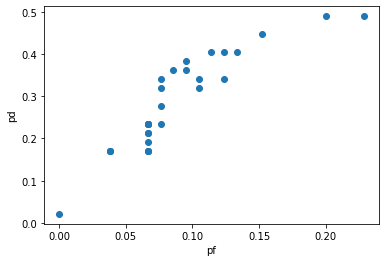

In [57]:
plt.scatter(pfs, recalls)
plt.xlabel('pf')
plt.ylabel('pd')

In [55]:
H = list(zip(cs, gammas))

In [58]:
M = [recalls[i] + pfs[i] for i in range(n_samples)]

In [59]:
M

[0.4474164133738602,
 0.2794326241134752,
 0.2083080040526849,
 0.35278622087132727,
 0.7179331306990882,
 0.02127659574468085,
 0.31023302938196556,
 0.300709219858156,
 0.6893617021276596,
 0.395339412360689,
 0.52806484295846,
 0.5185410334346504,
 0.47821681864235055,
 0.2794326241134752,
 0.42391084093211756,
 0.300709219858156,
 0.4166160081053698,
 0.23687943262411348,
 0.4569402228976697,
 0.2581560283687943,
 0.4642350557244174,
 0.23687943262411348,
 0.2083080040526849,
 0.300709219858156,
 0.300709219858156,
 0.2083080040526849,
 0.5991894630192502,
 0.4451874366767984,
 0.5375886524822695,
 0.23687943262411348]

In [80]:
poly = PolynomialFeatures(degree=2)

In [81]:
H_ = poly.fit_transform(H)

In [82]:
H_.shape

(30, 6)

In [72]:
#H_ = np.delete(H_,(1),axis=1)

In [83]:
H_train, H_test, M_train, M_test = train_test_split(H_, M)

In [84]:
clf = LinearRegression()
clf.fit(H_train, M_train)

LinearRegression()

In [85]:
preds = clf.predict(H_test)

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(M_test, preds)

0.8729818540000063